## Scipy:
### We have the min and max temperatures in a city In India for each months of the year.We would like to find a function to describe this and show it graphically, the datasetgiven below.
### Task:
### 1.fitting it to the periodic function
### 2.plot the fit
### Data
### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Min and max temperature')

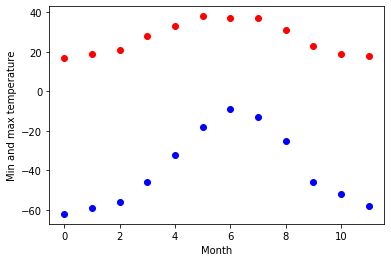

In [1]:
import numpy as np

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [2]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])
print(res_max)
print(res_min)

[ 27.62925851 -10.63955647  -0.22590565]
[-37.71075225 -25.20712454  -0.65355892]


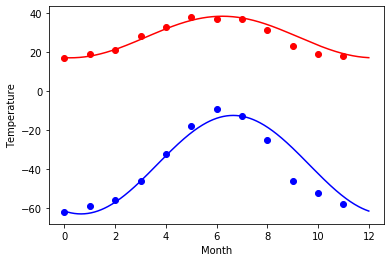

In [3]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

## Matplotlib:
### This assignment is for visualization using matplotlib:
### Data to use:
### url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#### titanic = pd.read_csv(url)
#### Charts to plot:
### 1. Create a pie chart presenting the male/female proportion
### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
s = round((df['sex'].value_counts())/len(df)*100,2)
pd.DataFrame(s)

,sex
male,64.35
female,35.57


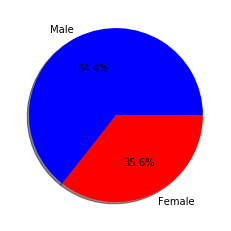

In [7]:
labels = ['Male','Female']
size = df.sex.value_counts()
fig1 , ax1 = plt.subplots()
ax1.pie(size,labels=labels,autopct='%1.1f%%',shadow = True,colors = ['Blue','Red'])
plt.show()


<Figure size 432x288 with 0 Axes>

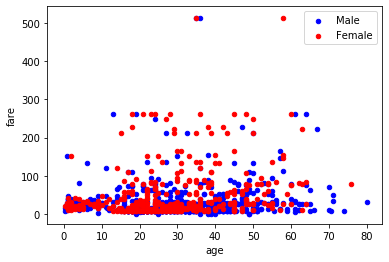

In [11]:
plt.figure()
category1 = df[df.sex=='male'].plot.scatter('age','fare',color='Blue',label='Male')
df[df.sex=='female'].plot.scatter('age','fare',color='Red',label='Female',ax=category1)